In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [11]:
TRAIN_PATH = os.path.join('data', 'train.csv')
TRAIN_PATH

'data\\train.csv'

In [12]:
data = pd.read_csv(TRAIN_PATH)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.shape

(42000, 785)

In [14]:
y =data.pop('label')
y = np.array(y).reshape(-1,1)

In [15]:
np_data = np.array(data)
np_data.shape

(42000, 784)

In [16]:
X = np_data.reshape((42000, 28, 28, 1))

In [17]:
print("Shape of X is ", X.shape)
print("Shape of y is ", y.shape)

Shape of X is  (42000, 28, 28, 1)
Shape of y is  (42000, 1)


In [18]:
y

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

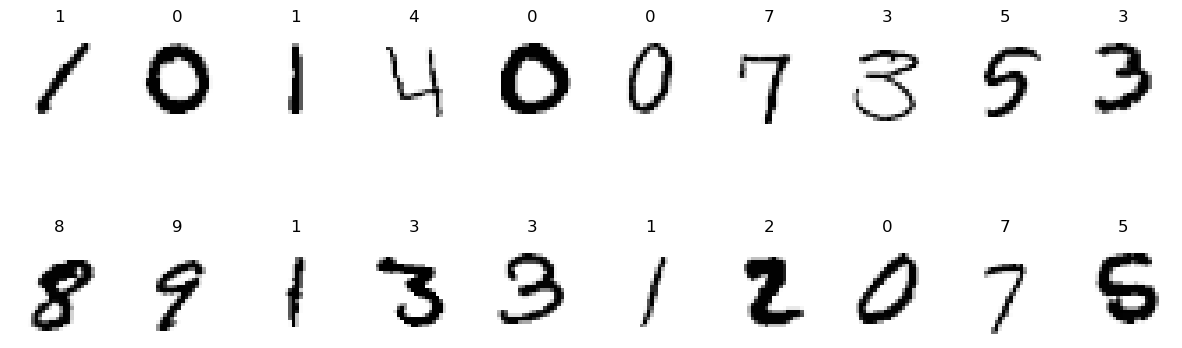

In [19]:
plt.figure(figsize=(15,5))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X[i,:,:], cmap='Greys')
    plt.title(y[i][0])
    plt.axis('off')

In [20]:
X[0].shape

(28, 28, 1)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

In [22]:
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of X_val = ", X_val.shape)
print("Shape of y_val = ", y_val.shape)

Shape of X_train =  (33600, 28, 28, 1)
Shape of y_train =  (33600, 1)
Shape of X_val =  (8400, 28, 28, 1)
Shape of y_val =  (8400, 1)


In [23]:
def generator(data, label, batch_size):
    num_batch = data.shape[0] // batch_size
    
    while True:
        start = 0
        for batch in range(num_batch):
            batch_data = np.zeros((batch_size, 28, 28, 1))
            batch_label = np.zeros((batch_size, 10), dtype='int')
            for i in range(batch_size):
                batch_data[i,:,:,:] = data[start+i,:,:]
                batch_label[i,label[start+i,0]] = 1
            start += batch_size
            yield batch_data, batch_label

In [24]:
batch_size = 100
train_generator = generator(X_train, y_train, batch_size)
val_generator = generator(X_val, y_val, batch_size)

In [25]:
model = Sequential()
model.add(layers.Rescaling(scale=1./255, input_shape=(28,28,1)))

model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, kernel_size=2, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, kernel_size=2, strides=2, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, kernel_size=4, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\ankit\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
steps_per_epoch = X_train.shape[0] // batch_size
validation_steps = X_val.shape[0] // batch_size

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [28]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 25, 25, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 9, 9, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 5, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 5, 5, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 2, 2, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │              

 Total params: 304,458 (1.16 MB)

 Trainable params: 303,626 (1.16 MB)

 Non-trainable params: 832 (3.25 KB)

None


In [184]:
model.fit(train_generator, epochs=10, verbose=1, validation_data=val_generator, 
          steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - categorical_accuracy: 0.9861 - loss: 0.0414 - val_categorical_accuracy: 0.9921 - val_loss: 0.0300
Epoch 2/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 29s 86ms/step - categorical_accuracy: 0.9887 - loss: 0.0385 - val_categorical_accuracy: 0.9914 - val_loss: 0.0290
Epoch 3/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 29s 87ms/step - categorical_accuracy: 0.9895 - loss: 0.0344 - val_categorical_accuracy: 0.9920 - val_loss: 0.0265
Epoch 4/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 29s 87ms/step - categorical_accuracy: 0.9897 - loss: 0.0311 - val_categorical_accuracy: 0.9921 - val_loss: 0.0252
Epoch 5/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 29s 87ms/step - categorical_accuracy: 0.9920 - loss: 0.0261 - val_categorical_accuracy: 0.9932 - val_loss: 0.0225
Epoch 6/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - categorical_accuracy: 0.9920 - loss: 0.0258 - val_categorical_accuracy: 0.9912 - val_loss: 0.0303
Epoch 7/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 31s 92ms/step - categorical_accuracy

In [31]:
import os
import cv2

In [3]:
# def compatible_image_converter(image):
#     plt.subplot(1,2,1)
#     plt.imshow(image)
#     #resize_image = cv2.resize(image, (28,28,3))
#     resize_image = image
#     grey_image = np.zeros((28,28))
#     for i in range(28):
#         for j in range(28):
#             if resize_image[i][j][0] == 255 and resize_image[i][j][1] == 255 and resize_image[i][j][2] == 255:
#                 continue
#             elif resize_image[i][j][0] == 0 and resize_image[i][j][1] == 0 and resize_image[i][j][2] == 0:
#                 grey_image[i][j] = 255
#             else:
#                 grey_image[i][j] = 0.299*resize_image[i][j][0] + 0.587*resize_image[i][j][2] + 0.114*resize_image[i][j][2]
    
#     plt.subplot(1,2,2)
#     plt.imshow(grey_image, cmap='Greys')
    
#     final = np.zeros((100,28,28,1))
#     for i in range(100):
#         final[i,:,:,0] = grey_image
    
#     return final

In [4]:
# def compatible_image_converter(image):
#     plt.subplot(1,2,1)
#     plt.imshow(image)
#     resize_image = cv2.resize(image, (28,28))
#     resize_image = image
#     grey_image = np.zeros((28,28))
#     for i in range(28):
#         for j in range(28):
#                 grey_image[i][j] = 0.299*resize_image[i][j][0] + 0.587*resize_image[i][j][2] + 0.114*resize_image[i][j][2]
    
#     plt.subplot(1,2,2)
#     plt.imshow(255-grey_image, cmap='Greys')
    
#     final = np.zeros((100,28,28,1))
#     for i in range(100):
#         final[i,:,:,0] = 255 - grey_image
    
#     return final

In [37]:
def compatible_image_converter(image):
    plt.subplot(1,2,1)
    plt.imshow(image)
    resize_image = cv2.resize(image, (28,28))
    grey_image = resize_image[:,:,0]
#     for i in range(28):
#         for j in range(28):
#                 grey_image[i][j] = 0.299*resize_image[i][j][0] + 0.587*resize_image[i][j][2] + 0.114*resize_image[i][j][2]
    
    plt.subplot(1,2,2)
    plt.imshow(255-grey_image, cmap='Greys')
    
    final = np.zeros((100,28,28,1))
    for i in range(100):
        final[i,:,:,0] = 255-grey_image
    
    return final

In [38]:
image = cv2.imread(r"C:\Users\ankit\OneDrive - XLRI\Desktop\two.jpg")

In [39]:
image.shape

(512, 512, 3)

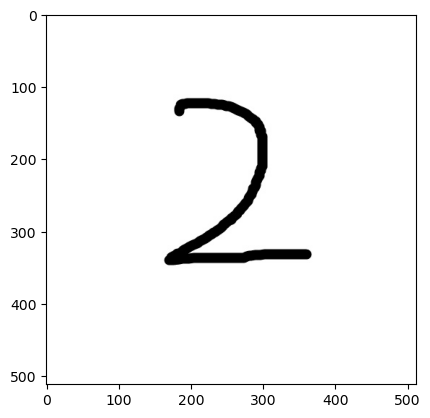

In [40]:
plt.imshow(image)

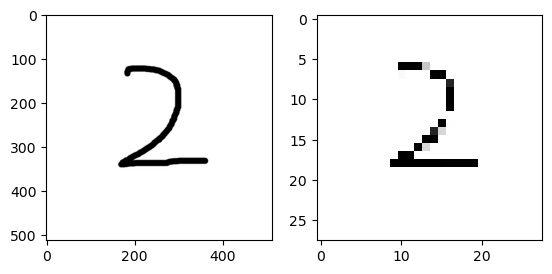

In [41]:
final = compatible_image_converter(image)

In [42]:
prediction = model.predict(final)[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [43]:
prediction

array([1.5133398e-05, 1.1285958e-03, 8.2955635e-01, 2.5810765e-02,
       6.6255547e-05, 1.4951819e-06, 2.3145158e-06, 1.4338720e-01,
       1.2493887e-05, 1.9552928e-05], dtype=float32)

In [66]:
test.shape

(28000, 784)

In [69]:
np_test = np.array(test)
np_test.shape

(28000, 784)

In [70]:
test = X = np_test.reshape((28000, 28, 28, 1))

In [72]:
test.shape

(28000, 28, 28, 1)

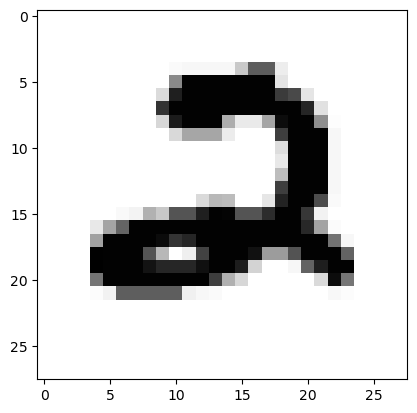

In [75]:
plt.imshow(test[0], cmap='Greys')

In [383]:
img = cv2.imread(r"C:\Users\ankit\OneDrive - XLRI\Desktop\cherryseven.jpg",0)
img = 255-img

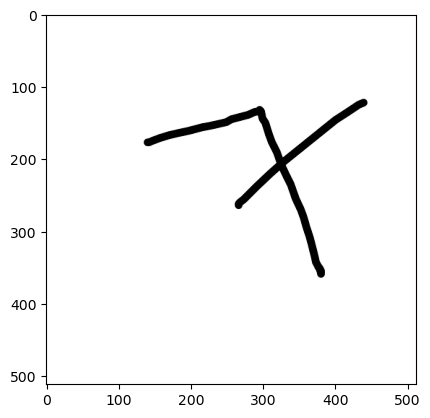

In [384]:
plt.imshow(img, cmap='Greys')

In [385]:
img.shape

(512, 512)

In [386]:
vsum = np.sum(img, axis=0)

In [387]:
vsum.shape

(512,)

In [388]:
vsum

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [389]:
vdiff = np.diff(vsum.astype('float'))

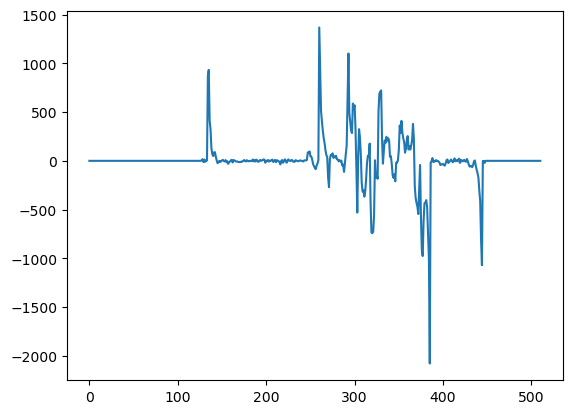

In [390]:
plt.plot(vdiff)

In [417]:
def check_image_validity(image):
    rows = image.shape[0]
    cols = image.shape[1]
    hsum = np.sum(image, axis=1)
    vsum = np.sum(image, axis=0)
    hzero = len(hsum[hsum == 0])
    vzero = len(vsum[vsum == 0])
    print(rows, cols, hzero, vzero)
    if hzero > 0.8*rows or vzero > 0.8*cols:
        return False
    else:
        return True

63 479
251 416 83 128


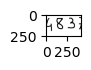

In [419]:
localization = []
right = 0
count = 1
while vdiff[right] == 0:
    right += 1
leftmid = right // 2
i = right
while i < vdiff.shape[0]:
    if vdiff[i] != 0:
        i += 1
        continue
    else:
        left = i
        while i < vdiff.shape[0] and vdiff[i] == 0:
            i += 1
        right = i
        if right-left <= 5:
            continue
        else:
            rightmid = (left+right) // 2
            
            print(leftmid, rightmid)
            temp = img[:,leftmid:rightmid]
            if check_image_validity(temp):
                localization.append(temp)
                plt.subplot(1, 12, count)
                count += 1
                plt.imshow(img[:,leftmid:rightmid], cmap='Greys')
            leftmid = rightmid
    i += 1

In [393]:
def final_prediction(model, image):
    prediction = list(model.predict(image)[0])
    temp = 0
    for i in range(len(prediction)):
        if prediction[i] > temp:
            temp = prediction[i]
            ans = i
    return ans

In [182]:
def compatible_image_converter(image):
        resize_image = cv2.resize(image, (28,28))
        #grey_image = resize_image[:,:,0]

        final = np.zeros((100,28,28,1))
        for i in range(100):
            final[i,:,:,0] = resize_image
        return final

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\ankit\AppData\Local\Temp\ipykernel_35172\282074929.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, n, i+1)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


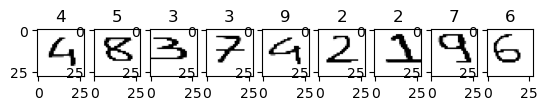

In [185]:
n = len(localization)
plt.imshow(combi, cmap='Greys')
ans = []
for i in range(n):
    temp = localization[i]
    final = np.zeros((temp.shape[0], temp.shape[1], 1))
    final[:,:,0] = temp    
    final = compatible_image_converter(final)
    plt.subplot(1, n, i+1)
    plt.imshow(final[0], cmap='Greys')
    prediction = final_prediction(model, final)
    ans.append(prediction)
    plt.title(prediction)
    

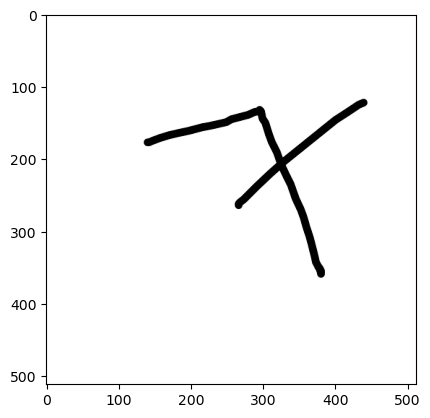

In [424]:
img = cv2.imread(r"C:\Users\ankit\OneDrive - XLRI\Desktop\cherryseven.jpg",0)
#img_3d = np.zeros((img.shape[0], img.shape[1], 1))
#img_3d[:,:,0] = 255-img
img = 255-img
plt.imshow(img, cmap='Greys')

In [425]:
def check_localized_image_validity(image):
    rows = image.shape[0]
    cols = image.shape[1]
    hsum = np.sum(image, axis=1)
    vsum = np.sum(image, axis=0)
    hzero = len(hsum[hsum == 0])
    vzero = len(vsum[vsum == 0])
    print(rows, cols, hzero, vzero)
    if hzero > 0.8*rows or vzero > 0.8*cols:
        return False
    else:
        return True

In [426]:
def image_localizer(img):
    vsum = np.sum(img, axis=0)
    vdiff = np.diff(vsum.astype('float'))
    plt.plot(vdiff)
    localization = []
    right = left = 0
    count = 1
    while vdiff[right] == 0:
        right += 1
    leftmid = right // 2
    pxl_x = right
    while pxl_x < vdiff.shape[0]:
        if vdiff[pxl_x] == 0:
            left = pxl_x
            #print(left)
            while pxl_x < vdiff.shape[0] and vdiff[pxl_x] == 0:
                pxl_x += 1
            right = pxl_x
            if right-left <= 5:
                continue
            else:
                rightmid = (left+right) // 2
                print(leftmid, rightmid)
                temp = img[:,leftmid:rightmid]
                if check_image_validity(temp):
                    temp_3d = np.zeros((temp.shape[0], temp.shape[1], 1))
                    temp_3d[:,:,0] = temp
                    localization.append(temp_3d)
                    plt.subplot(1, 15, count)
                    count += 1
                    plt.imshow(temp, cmap='Greys')
                leftmid = rightmid
        pxl_x += 1
    return localization

63 479
512 416 256 96


C:\Users\ankit\AppData\Local\Temp\ipykernel_35172\2992442045.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 15, count)


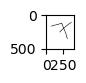

In [427]:
localization = image_localizer(img)

In [428]:
localization[0].shape

(512, 416, 1)

In [432]:
resize = cv2.resize(localization[0], (28,28))

In [444]:
final = np.zeros((2,28,28,1))
final[0,:,:,0] = resize
final[1,:,:,0] = resize

In [445]:
final.shape

(2, 28, 28, 1)

In [453]:
pred = model.predict(final)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


In [452]:
for i in range(pred.shape[0]):
    print(np.argmax(pred[i]))

7
7


In [455]:
pred.dtype

dtype('float32')

In [456]:
list(pred)

[0.00017634266,
 0.00079884526,
 0.00041042967,
 0.26552626,
 0.00043322885,
 0.00021605912,
 6.311999e-07,
 0.73148525,
 0.0005359416,
 0.00041690472]